In [184]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath('C:/Users/dylan/OneDrive/Documents/Coding/LearningNumericalMethods/Chapter 3/Ch3_3.4_Fourier_Analysis.ipynb'))
sys.path.append(os.path.dirname(SCRIPT_DIR))
from Fourier.fourierAlgos import *
from RungeKutta.rk4Algo import dsbRK4

plt.style.use('seaborn-v0_8-bright')
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.autolayout"] = True
plt.rcParams['lines.linewidth'] = 0.75

### Question 1

Consider a particle oscillating in the nonharmonic potential

\begin{equation}
    V(x) = \frac{1}{p} k |x|^p, \quad p \neq 2
\end{equation}

While nonforced oscillations in this potential are always periodic, they are not sinusoidal.

<font size='-0.5'> a. For p=12, decomposed the solution x(t) into its Fourier components.

b. Determine the components that contribute at least 10%.

c. Check that resuming the components reproduces the input signal.</font>

##### Answer

Let's first remake recreat the model and apply the RK4 model to generate the signal.

In [185]:
w0 = 1

def model2(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    p = 12

    v[0] = y[1]
    v[1] = - (w0*w0)*(y[0]**(p-1))

    return v

The code below will generate the oscillation using the RK4 method, which will be fourier analyzed. Keep in mind that I generated a signal where $y(0) \simeq y(N)$, but I've zoomed in on a specific amount of time in the graphing.

In [186]:
h = 0.1
N = 993

q, t = dsbRK4([0,w0*1], model2, 2, N, h)
x, v = q

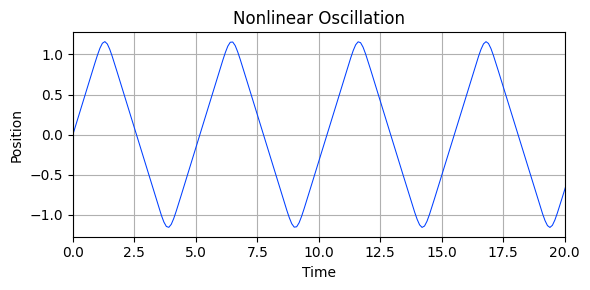

In [187]:
plt.figure(figsize = (6, 3))
plt.xlim(0,20)
plt.title('Nonlinear Oscillation')
plt.ylabel('Position')
plt.xlabel('Time')
plt.plot(t, x)
plt.show()

With the position function now generated, let's apply the <i>Discrete Fourier Transform</i> to decompose into the Fourier component frequencies.

In [188]:
omegas, Yn = DFT(x, len(x), h)

<i><b>How can we determine the components that contribute at least $10\%$ to the entire position function?</b></i>

To do this, we need to figure out the maximum $Y_n$ value found and divide each Fourier component by the maximum. Then, we can search for all the Fourier component ratios $ Y_n/Y_{max} > 0.1$

In [189]:
min_Yn = []
min_omegas = []
ratio = []

max_Yn = max(abs(Yn))

for i in range(0, len(Yn)):
    if abs(Yn[i])/max_Yn > 0.09:
        min_omegas.append(omegas[i])
        ratio.append(Yn[i]/max_Yn)

print("Omegas Contributing at least 9% : " + str(min_omegas[0:len(min_omegas)//2]))
print("Ratios of Contribution: " + str(ratio[0:len(min_omegas)//2]))

Omegas Contributing at least 9% : [1.2022207536395983, 3.606662260918795]
Ratios of Contribution: [(0.30282358971372636-0.953046627145223j), (-0.07263120028897097+0.05514949369846275j)]


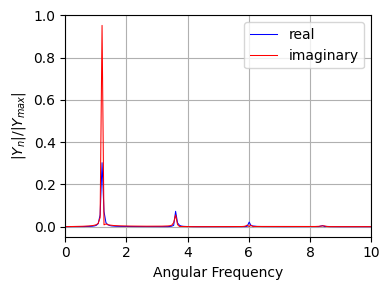

In [190]:
plt.figure(figsize = (4, 3))
plt.xlim(0,10)
plt.plot(omegas, abs(Yn.real)/max_Yn, 'b', label = 'real')
plt.plot(omegas, abs(Yn.imag)/max_Yn, 'r', label = 'imaginary')
plt.ylabel("$|Y_n|/|Y_{max}|$")
plt.xlabel('Angular Frequency')
plt.legend()
plt.show()

<i><b>What can we gather from the analysis above?</b></i>

Notice the peaks in Fourier components. These correspond to the angular frequencies that contribute the most to the Fourier series that generate the nonlinear oscillation.

<i><b>How can I believe that these are the frequencies that make up the most of the </b></i>

Let's use the frequencies that contribute at least 9% of the oscillation to write the first few terms of the Fourier series. Let's also compare it to the <i>inverse Discrete Fourier Transform</i>

In [191]:
tmin = np.arange(0, N*h, h)
ymin = 0.953046627145223*np.sin(1.2022207536395983*tmin) - 0.05514949369846275*np.sin(3.606662260918795*tmin)

t, yk = invDFT(Yn, h)

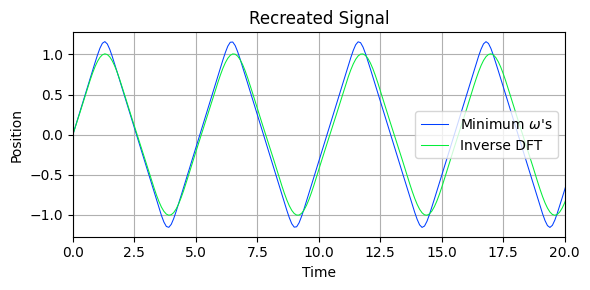

In [192]:
plt.figure(figsize = (6, 3))
plt.xlim(0,20)
plt.plot(t, yk, label = 'Minimum $\omega$\'s')
plt.plot(tmin, ymin, label = 'Inverse DFT')
plt.title("Recreated Signal")
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend()
plt.show()

As can be seen from the graphs above, the signal can roughly be recreated only using the $\omega$'s that appear to dominate the Fourier series. However, including all the possible $\omega$'s at their respective strengths (as done by the inverse DFT method) accurately reproduces the original oscillation being analyzed.

### Question 2

Recall the perturbed harmonic oscillator

\begin{equation}
    V(x) \simeq \frac{1}{2}kx^2 \left( 1-\frac{2}{3} \alpha x \right) \quad \rightarrow \quad \ddot{x} = \omega_0^2 \left(-x+\alpha x^2\right)
\end{equation}

In [193]:
def model1(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    #Figures out how many dimensions the system is based on the dimension of the array 
    l = y.size
    #creates an array of velocities to store the system of First order ODEs
    v = np.empty([l])
    ## This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    alpha = 0.15

    v[0] = y[1]
    v[1] = -(w0*w0)*(y[0]-alpha*y[0]*y[0])

    return v

Let's explore a Fourier analysis of this particular oscillation. Firstly, we need to obviously generate the oscillation by solving for the EoM using the RK4 method.

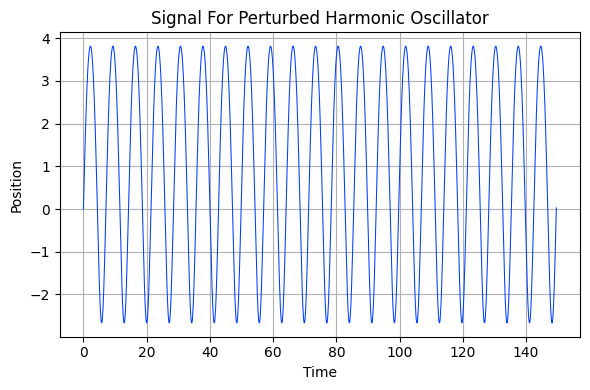

In [194]:
N = 1497 ; h = 0.1

q, t = dsbRK4([0, w0*3], model1, 2, N, h)
y, v = q

plt.figure(figsize = (6, 4))
plt.plot(t, y)
plt.title('Signal For Perturbed Harmonic Oscillator')
plt.xlabel('Time')
plt.ylabel('Position')
plt.show()

From here, we can apply the discrete fourier transform algorithm to decompose the signal into the particular frequencies

In [195]:
omegas, Yn = DFT(y, len(y), h)

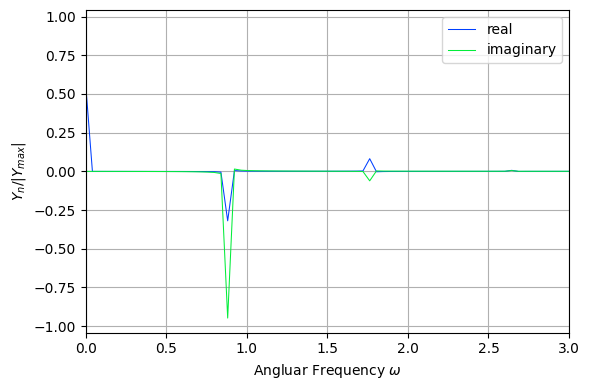

In [196]:
plt.figure(figsize = (6,4))
plt.xlim(0,3)
plt.plot(omegas, Yn.real/max(abs(Yn)) ,label = 'real')
plt.plot(omegas, Yn.imag/max(abs(Yn)), label = 'imaginary')
plt.xlabel("Angluar Frequency $\omega$")
plt.ylabel("$Y_n/|Y_{max}|$")
plt.legend()
plt.show()

<b><i>Whoa, why does $\omega = 0$ have a strong Fourier coefficient?? And we explain the other frequencies on the graph?</i></b>

I was very confused by everything I saw on the Fourier analysis graph. However, I was able to gain somewhat of an understanding about the decomposition:

1. $\omega = 0$ for the real part of the Fourier transform implies there's a term such that $a_1\cos(0t) = a_1$. This means there's some non-oscillatory term in our Fourier analysis. The reason I think such a term exists is because the original EoM looks like it's equilibrium position is shifted upwards.
2. The large imaginary peak coincides closely with the original sinusiodal frequency of the oscillation.

To verify these ideas, we'll construct the signal using only the components of the Fourier analysis that contribute at least $5\%$ to the Fourier series. 

In [197]:
max_Yn = max(abs(Yn))
req_Yn = []
req_omegas = []
ratio = []

for i in range(0, len(Yn)):
    if abs(Yn[i])/max_Yn > 0.05:
        req_omegas.append(omegas[i])
        ratio.append(Yn[i]/max_Yn)

req_omegas = np.array(req_omegas)
ratio = np.array(ratio)

xmin = 0
tmin = np.arange(0, N*h, h)


for i in range(0,len(req_omegas)):
    xmin += ratio.real[i]*np.cos(req_omegas[i]*tmin) - ratio.imag[i]*np.sin(req_omegas[i]*tmin)

t, y = invDFT(Yn, h)

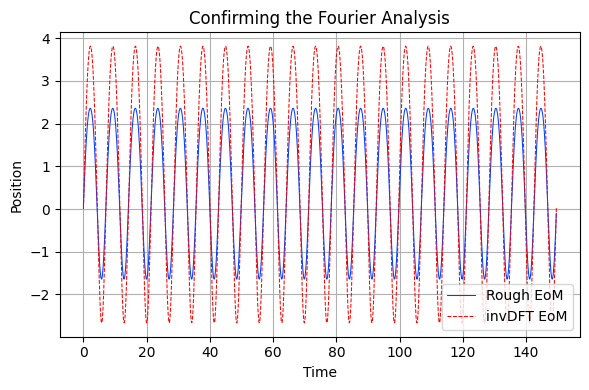

In [198]:
plt.figure(figsize = (6,4))
plt.title("Confirming the Fourier Analysis")
plt.plot(t, xmin, label = "Rough EoM")
plt.plot(t, y, 'r--', label = "invDFT EoM")
plt.xlabel("Time")
plt.ylabel("Position")
plt.legend(loc = "lower right")
plt.show()

### Question 3

The next step is to attempt to apply the Fourier analysis code to the choatic pendulum behaviors. To do this, we needed to copy our code from <b>3.3 Realistic Pendula</b> to be able to analyze the EoMs

In [199]:
def realrealPen(t, y):
    """
    Specifies the ODE to be solved by the RK4 function. This method specifies the multidimensional derivatives of the system. This models a realistic pendulum with friction and a driving force.

    Parameters
    ----------
    t : int or float
        The time values that are iterated through
    y : int or float
        The function values that are iterated through
    g : float
        Sets the gamma value in the Duffing equation
    Returns
    -------
    The velocities of the particular coordinates of interest.
    """
    # Creates an array of velocities to store the system of First order ODEs
    v = np.empty([y.size])
    # This is where the system of ODEs would go. You would have them written as v[0], v[1], ...

    v[0] = y[1]
    v[1] = -(w0**2)*np.sin(y[0]) - 2*beta*y[1] + gamma*(w0**2)*np.cos(w*t)

    return v


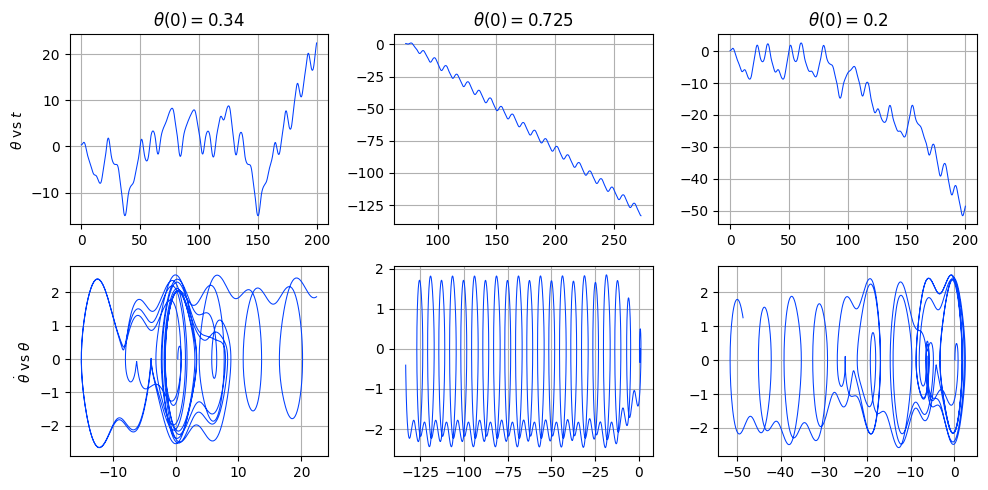

In [ ]:
thetas = [0.34, 0.725, 0.2]
w0 = 1 ; beta = 0.1 ; gamma = 0.5 ; w = 2/3 ; N = 2000 ; h = 0.1

for i in range(3):
    vars()['coords'+str(i)] , vars()['t'+str(i)]= dsbRK4([thetas[i], 0], realrealPen, 2, N, h)
    vars()['theta'+str(i)], vars()['thetadot'+str(i)] = vars()['coords'+str(i)][0], vars()['coords'+str(i)][1]

fig, axs = plt.subplots(2, 3, figsize=(10,5))

axs[0][0].plot(t0, theta0)
axs[0][0].set_ylabel('$\\theta$ vs $t$')
axs[0][0].set_title('$\\theta(0) = {}$'.format(round(thetas[0], 4)))

axs[1][0].plot(theta0, thetadot0)
axs[1][0].set_ylabel('$\\dot{\\theta}$ vs $\\theta$')

axs[0][1].plot(t1, theta1)
axs[0][1].set_title('$\\theta(0) = {}$'.format(round(thetas[1], 4)))

axs[1][1].plot(theta1, thetadot1)

axs[0][2].plot(t2, theta2)
axs[0][2].set_title('$\\theta(0) = {}$'.format(round(thetas[2], 4)))

axs[1][2].plot(theta2, thetadot2)

plt.show()

Now that we have our EoMs for different chaotic behavior, let's attempt to deduce the frequency spectrum of the pendulums.

In [201]:
for i in range(3):
    '''vars()['omegas'+str(i)] = fftfreq(N, h)
    vars()['Yn'+str(i)] = fft(vars()['theta'+str(i)])'''
    
    vars()['omegas'+str(i)], vars()['Yn'+str(i)] = DFT(vars()['theta'+str(i)] , N, h)

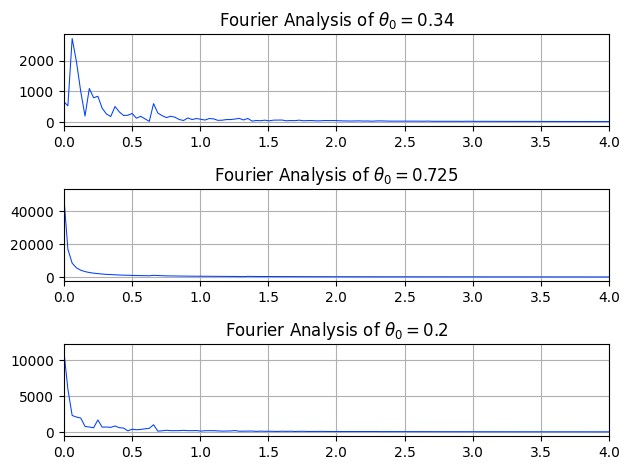

In [202]:
fig, ax = plt.subplots(3,1)

for i in range(3):
    x = vars()['omegas'+str(i)]
    y = vars()['Yn'+str(i)]

    ax[i].set_xlim(0,4)
    ax[i].set_title("Fourier Analysis of $\\theta_0 = $" + str(thetas[i]))
    ax[i].plot(x, abs(y))
    
plt.show()

Reading the graphs of the Fourier components, notice that we can verify the statement that "the number of cycles in the phase-space plots corresponds to the number of major frequencies contained in $x(t)$."

## Pendulum Bifurcations

The orginial computational textbook fucking blows for this section, so I'll be reading and working through Taylor for the next section.

Let's first write the DDP equation using Taylor's coefficients:

\begin{equation}
    \ddot{\phi} + 2\beta\dot{\phi} +\omega_0^2\phi = \gamma \omega_0^2 cos(\omega t)
\end{equation}

The parameters he seems to be using for most of his plots at the beginning are:

\begin{equation}
    \omega = 1, \quad \omega_0 = 1.5\omega, \quad \phi(0) = 0, \quad \dot{\phi}(0) = 0, \quad \beta = \omega_0/4
\end{equation}

The reason he chose these parameters is because having $\omega_0 = 1.5\omega$ brings the system fairly close to resonance which makes it easier to see chaotic behavior. Also, choosing the drive angular frequency to be that means the driving period is $1s$ which makes it really easy to see the periods on the graphs.

To first confirm that the code is to the liking of Taylor, let's try to create <b>Figure 12.3</b> in the textbook

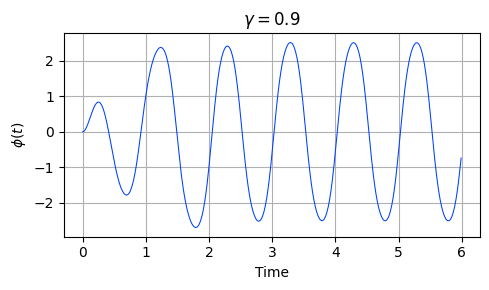

In [296]:
w = 2*pi ; w0 = 1.5*w ; beta = w0/4 ; N = 600 ; h = 0.01

gamma = 0.9
coords, t = dsbRK4([0, 0], realrealPen, 2, N, h)
x, v = coords

plt.figure(figsize = (5, 3))
plt.title('$\\gamma = 0.9$')
plt.ylabel('$\\phi(t)$')
plt.xlabel('Time')
plt.plot(t, x)
plt.show()

Next, we'll try to recreate <b>Figure 12.4</b>. Notice the initial transients die out after about 9 drive cycles, and the motion settles down to an attractor with the same period as the driver.

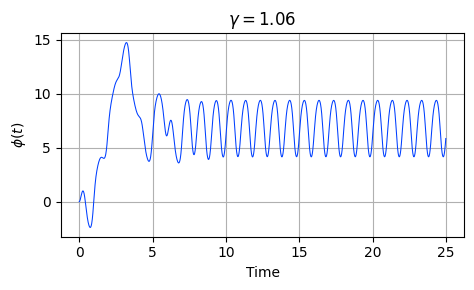

Time | Phi(t)
-------------
19s  | 6.0384267231893825
20s  | 6.035204044637693
21s  | 6.037705454787791
22s  | 6.035773389796862
23s  | 6.037271440244712
24s  | 6.036113326377649


In [298]:
gamma = 1.06 ; N = 2500

coords, t = dsbRK4([0, 0], realrealPen, 2, N, h)
x, v = coords

plt.figure(figsize = (5, 3))
plt.title('$\\gamma = 1.06$')
plt.ylabel('$\\phi(t)$')
plt.xlabel('Time')
plt.plot(t, x)
plt.show()

print("Time | Phi(t)")
print("-------------")
for i in range(1900, 2500, 100):
    print(str(round(t[i])) + "s  | " + str(x[i]))


Notice that after the transients die out, the oscillation becomes periodic with $T = 1s$ which is what we would've expected based on the angular frequency of the driving force. This implies that <b><i>$\phi(t)$ approaches an attrractor that is period with the same period as the driver.</b></i>

Let's continue to explore how the oscillation gets affected by the magnitude of the driving strength by increasing $\gamma = 1.073$.

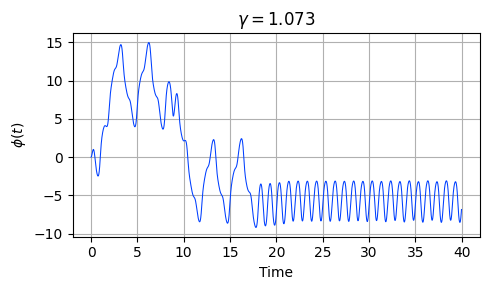

Time | Phi(t)
-------------
35s  | -6.414905233665532
36s  | -6.6232757626973235
37s  | -6.409892414686795
38s  | -6.640771128518843
39s  | -6.409038895043038


In [299]:
gamma = 1.073 ; N = 4000

coords, t = dsbRK4([0, 0], realrealPen, 2, N, h)
x, v = coords

plt.figure(figsize = (5, 3))
plt.title('$\\gamma = 1.073$')
plt.ylabel('$\\phi(t)$')
plt.xlabel('Time')
plt.plot(t, x)
plt.show()

print("Time | Phi(t)")
print("-------------")

for i in range(3500, 4000, 100):
    print(str(round(t[i])) + "s  | " + str(x[i]))

For the rest of time, the odd times values will always be $-6.40899$ and the even values will be $-6.64380$. This means that the period of this oscillation is now twice the period of the driving frequency. This motion is referred to as <b>period two</b>.

<b><i>It still looks like just a sinusiodal function though?</b></i>

True. The dominate motion is still a simple wave solution, but there exists a subharmonic term with period 2.

Increasing the driving frequency a little further to $\gamma = 1.077$, we can find an attractor for which the subharmonic term is the dominate term.

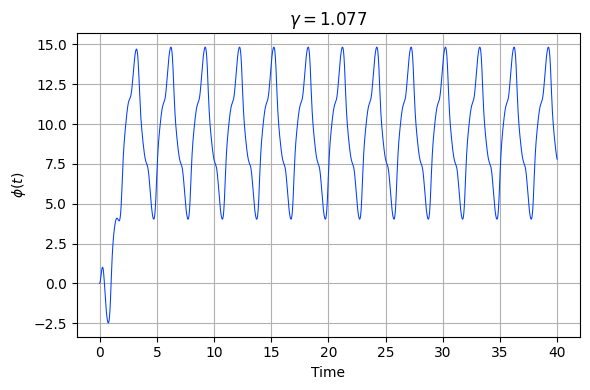

Time | Phi(t)
-------------
30s  | 13.812247501970992
31s  | 7.758529829467642
32s  | 6.8726571072001645
33s  | 13.812247400761564
34s  | 7.75852965696783
35s  | 6.872657379954758
36s  | 13.812247358625354
37s  | 7.758529585165654
38s  | 6.872657493483076
39s  | 13.812247341083863


In [300]:
gamma = 1.077 ; N = 4000 ; h = 0.01

coords, t = dsbRK4([0, 0], realrealPen, 2, N, h)
x, v = coords

plt.figure(figsize = (6, 4))
plt.title('$\\gamma = 1.077$')
plt.ylabel('$\\phi(t)$')
plt.xlabel('Time')
plt.plot(t, x)
plt.show()

print("Time | Phi(t)")
print("-------------")

for i in range(3000, 4000, 100):
    print(str(round(t[i])) + "s  | " + str(x[i]))

Notice from the table that now the DDP is <b>period three</b>. It's hard to tell by starting at the graph, but it's easy to see there's an attractor that dominates the solution. Let's consider the exact same system, but with different intial conditions

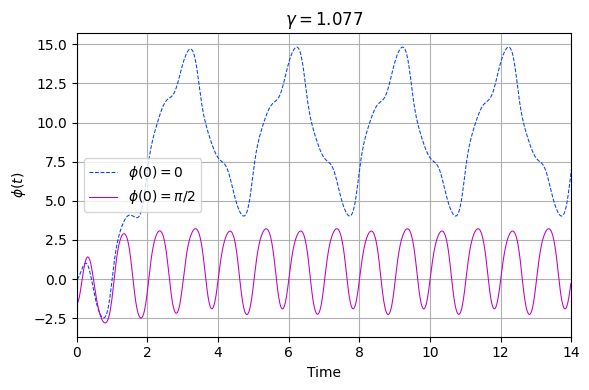

In [318]:
coords1, t1 = dsbRK4([-np.pi/2, 0], realrealPen, 2, N, h)
x1, v1 = coords1

plt.figure(figsize = (6, 4))
plt.title('$\\gamma = 1.077$')
plt.ylabel('$\\phi(t)$')
plt.xlabel('Time')
plt.xlim(0,14)
plt.plot(t,x, '--', label = "$\\phi(0) = 0$")
plt.plot(t1, x1, 'm', label = "$\\phi(0) = \\pi/2$")
plt.legend()
plt.show()

As you can see, once the transients die out, there are two attractors that are totally different. Evindently, for a nonlinear oscillator, different initial conditions can lead to totally different attractors.

### Period-Doubling Cascade

Continuing to double the period with a certain initial condition leads to a <b>pendulum-doubling cascade</b>.b This phenomena is found many completely different nonlinear systems - electrical circuits, chemical reactions, balls bouncing on oscillating surfaces, and many more.

Each of these systems has a <i>control parameter</i> that can be varied to influence the chaotic-ness of the system (e.g. the driving strength of a DDP, voltage in an electrical circuit, a flow rate in a chemical reaction).

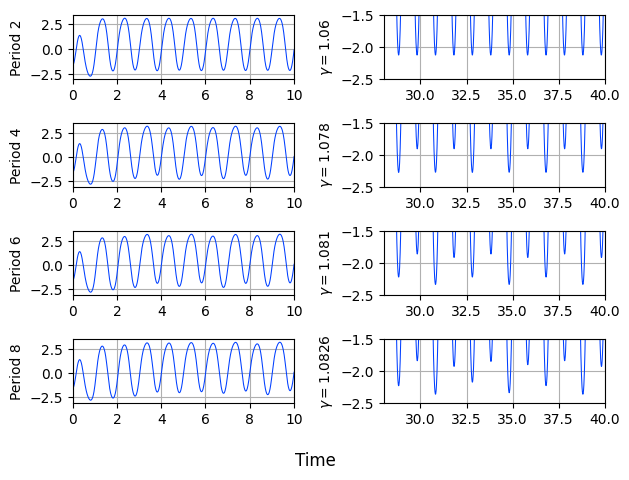

In [337]:
fig, ax = plt.subplots(4,2)
gammas = [1.06, 1.078, 1.081, 1.0826]

N = 4000

for i in range(4):
    gamma = gammas[i]

    coords, t = dsbRK4([-np.pi/2, 0], realrealPen, 2, N, h)
    x, v = coords

    ax[i][0].set_xlim(0,10)
    ax[i][0].set_ylabel("Period " + str(2*(i+1)))
    ax[i][0].plot(t, x)

    ax[i][1].set_xlim(28, 40)
    ax[i][1].set_ylim(-2.5, -1.5)
    ax[i][1].set_ylabel("$\\gamma=$" + str(gamma))
    ax[i][1].plot(t, x)

fig.supxlabel('Time')
plt.show()

### Bifurcation Diagrams

<b><i>Should the large amplitudes exist in the zoomed out birfucation diagram?</b></i>

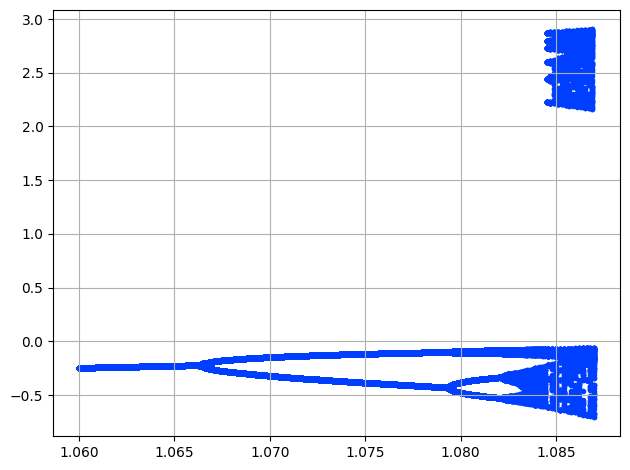

In [346]:
#With N=60000 h=0.01 8m 10.8s runtime

gamma_range = np.arange(1.06, 1.0871, 0.0001)
positions = []
freqs = []

N = 60000 ; h = 0.01

for i in range(0, len(gamma_range)):
    gamma = gamma_range[i]

    coords, t = dsbRK4([-pi/2, 0], realrealPen, 2, N, h)
    x, v = coords

    for j in range(50000, 60000, 100):
        positions.append(x[j])
        freqs.append(gamma)

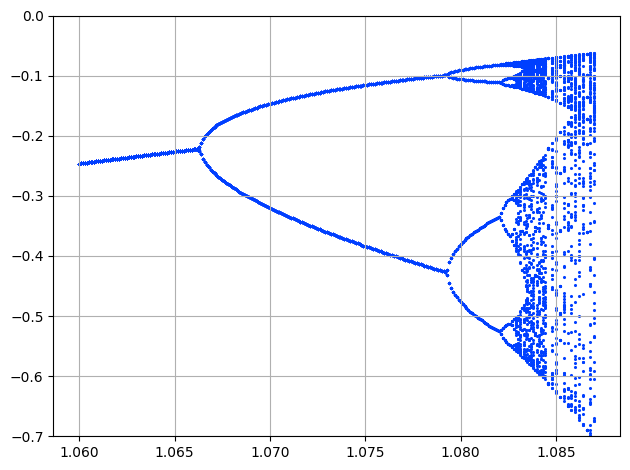

In [371]:
plt.ylim(-0.7,0)
plt.scatter(freqs, positions, marker = '.', s=6)